In [29]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [34]:
%matplotlib inline

In [3]:
def coin_flip():
    coin = random.randint(0,1)
    if coin == 1:
        return True
    return False

In [26]:
def n_flips(n=2**16):
    head_flips = 0
    tail_flips = 0
    checkpoint = []
    for flip in range(n):
        if coin_flip():
            head_flips += 1
        else:
            tail_flips += 1
        if math.log2(flip+1) % 1 == 0:
            checkpoint.append((head_flips, tail_flips)
    return checkpoint
flip_data = n_flips()

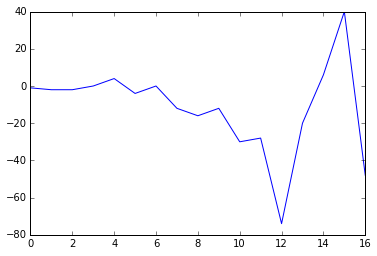

In [37]:
plt.plot([x-y for x,y in flip_data])